# Natural Language Processing with `nltk`

`nltk` is the most popular Python package for Natural Language processing, it provides algorithms for importing, cleaning, pre-processing text data in human language and then apply computational linguistics algorithms like sentiment analysis.

## Inspect the Movie Reviews Dataset

It also includes many easy-to-use datasets in the `nltk.corpus` package, we can download for example the `movie_reviews` package using the `nltk.download` function:

In [4]:
import nltk

In [5]:
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/kilingcheung/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [6]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
nltk.download("inaugural")

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/kilingcheung/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

You can also list and download other datasets interactively just typing:

    nltk.download()
    
in the Jupyter Notebook.

Once the data have been downloaded, we can import them from `nltk.corpus`

In [8]:
from nltk.corpus import movie_reviews

In [9]:
from nltk.corpus import inaugural

The `fileids` method provided by all the datasets in `nltk.corpus` gives access to a list of all the files available.

In particular in the movie_reviews dataset we have 2000 text files, each of them is a review of a movie, and they are already split in a `neg` folder for the negative reviews and a `pos` folder for the positive reviews:

In [10]:
len(movie_reviews.fileids())

2000

In [11]:
len(inaugural.fileids())

56

In [12]:
type(movie_reviews.fileids())

list

In [13]:
movie_reviews.fileids()[:5]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt']

In [14]:
inaugural.fileids()[:5]

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt']

In [15]:
movie_reviews.fileids()[-5:]

['pos/cv995_21821.txt',
 'pos/cv996_11592.txt',
 'pos/cv997_5046.txt',
 'pos/cv998_14111.txt',
 'pos/cv999_13106.txt']

`fileids` can also filter the available files based on their category, which is the name of the subfolders they are located in. Therefore we can have lists of positive and negative reviews separately.

In [16]:
negative_fileids = movie_reviews.fileids('neg')
positive_fileids = movie_reviews.fileids('pos')

In [17]:
help(movie_reviews.fileids)
!ls /Users/kilingcheung/nltk_data/corpora/movie_reviews

Help on method fileids in module nltk.corpus.reader.api:

fileids(categories=None) method of nltk.corpus.reader.plaintext.CategorizedPlaintextCorpusReader instance
    Return a list of file identifiers for the files that make up
    this corpus, or that make up the given category(s) if specified.

README neg    pos


In [18]:
len(negative_fileids), len(positive_fileids)

(1000, 1000)

We can inspect one of the reviews using the `raw` method of `movie_reviews`, each file is split into sentences, the curators of this dataset also removed from each review from any direct mention of the rating of the movie.

In [20]:
help(movie_reviews)

Help on CategorizedPlaintextCorpusReader in module nltk.corpus.reader.plaintext object:

class CategorizedPlaintextCorpusReader(nltk.corpus.reader.api.CategorizedCorpusReader, PlaintextCorpusReader)
 |  A reader for plaintext corpora whose documents are divided into
 |  categories based on their file identifiers.
 |  
 |  Method resolution order:
 |      CategorizedPlaintextCorpusReader
 |      nltk.corpus.reader.api.CategorizedCorpusReader
 |      PlaintextCorpusReader
 |      nltk.corpus.reader.api.CorpusReader
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize the corpus reader.  Categorization arguments
 |      (``cat_pattern``, ``cat_map``, and ``cat_file``) are passed to
 |      the ``CategorizedCorpusReader`` constructor.  The remaining arguments
 |      are passed to the ``PlaintextCorpusReader`` constructor.
 |  
 |  paras(self, fileids=None, categories=None)
 |      :return: the given file(s) as a list of
 |     

In [16]:
print(movie_reviews.raw(fileids=positive_fileids[0]))

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almost as 

In [17]:
type(inaugural)
type(positive_fileids)
print(inaugural.raw(fileids=inaugural.fileids()[-1]))

My fellow citizens:

I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.

Forty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace. Yet, every so often the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because We the People have remained faithful to the ideals of our forbearers, and true to our founding documents.

So it has been. So it must be with this generation of Americans.

That we are in the midst of crisis is now well understood. Our nation is at war, against a far-reaching network of violence and hatred. Our economy is badly weakened, a conse

In [18]:
obama_speech = inaugural.raw(fileids=inaugural.fileids()[-1])
print(obama_speech)
#type(obama_speech)

My fellow citizens:

I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.

Forty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace. Yet, every so often the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because We the People have remained faithful to the ideals of our forbearers, and true to our founding documents.

So it has been. So it must be with this generation of Americans.

That we are in the midst of crisis is now well understood. Our nation is at war, against a far-reaching network of violence and hatred. Our economy is badly weakened, a conse

## Tokenize Text in Words

In [19]:
romeo_text = """Why then, O brawling love! O loving hate!
O any thing, of nothing first create!
O heavy lightness, serious vanity,
Misshapen chaos of well-seeming forms,
Feather of lead, bright smoke, cold fire, sick health,
Still-waking sleep, that is not what it is!
This love feel I, that feel no love in this."""

The first step in Natural Language processing is generally to split the text into words, this process might appear simple but it is very tedious to handle all corner cases, see for example all the issues with punctuation we have to solve if we just start with a split on whitespace:

In [20]:
romeo_text.split()

['Why',
 'then,',
 'O',
 'brawling',
 'love!',
 'O',
 'loving',
 'hate!',
 'O',
 'any',
 'thing,',
 'of',
 'nothing',
 'first',
 'create!',
 'O',
 'heavy',
 'lightness,',
 'serious',
 'vanity,',
 'Misshapen',
 'chaos',
 'of',
 'well-seeming',
 'forms,',
 'Feather',
 'of',
 'lead,',
 'bright',
 'smoke,',
 'cold',
 'fire,',
 'sick',
 'health,',
 'Still-waking',
 'sleep,',
 'that',
 'is',
 'not',
 'what',
 'it',
 'is!',
 'This',
 'love',
 'feel',
 'I,',
 'that',
 'feel',
 'no',
 'love',
 'in',
 'this.']

In [21]:
print(obama_speech)
#obama_list = obama_speech.split()
#obama_list

My fellow citizens:

I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.

Forty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace. Yet, every so often the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because We the People have remained faithful to the ideals of our forbearers, and true to our founding documents.

So it has been. So it must be with this generation of Americans.

That we are in the midst of crisis is now well understood. Our nation is at war, against a far-reaching network of violence and hatred. Our economy is badly weakened, a conse

`nltk` has a sophisticated word tokenizer trained on English named `punkt`, we first have to download its parameters: 

In [22]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/r38411/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Then we can use the `word_tokenize` function to properly tokenize this text, compare to the whitespace splitting we used above:

In [23]:
help(nltk.word_tokenize)

Help on function word_tokenize in module nltk.tokenize:

word_tokenize(text, language='english', preserve_line=False)
    Return a tokenized copy of *text*,
    using NLTK's recommended word tokenizer
    (currently an improved :class:`.TreebankWordTokenizer`
    along with :class:`.PunktSentenceTokenizer`
    for the specified language).
    
    :param text: text to split into words
    :type text: str
    :param language: the model name in the Punkt corpus
    :type language: str
    :param preserve_line: An option to keep the preserve the sentence and not sentence tokenize it.
    :type preserve_line: bool



In [24]:
romeo_words = nltk.word_tokenize(romeo_text)

In [25]:
romeo_words

['Why',
 'then',
 ',',
 'O',
 'brawling',
 'love',
 '!',
 'O',
 'loving',
 'hate',
 '!',
 'O',
 'any',
 'thing',
 ',',
 'of',
 'nothing',
 'first',
 'create',
 '!',
 'O',
 'heavy',
 'lightness',
 ',',
 'serious',
 'vanity',
 ',',
 'Misshapen',
 'chaos',
 'of',
 'well-seeming',
 'forms',
 ',',
 'Feather',
 'of',
 'lead',
 ',',
 'bright',
 'smoke',
 ',',
 'cold',
 'fire',
 ',',
 'sick',
 'health',
 ',',
 'Still-waking',
 'sleep',
 ',',
 'that',
 'is',
 'not',
 'what',
 'it',
 'is',
 '!',
 'This',
 'love',
 'feel',
 'I',
 ',',
 'that',
 'feel',
 'no',
 'love',
 'in',
 'this',
 '.']

In [26]:
obama_words = nltk.word_tokenize(obama_speech)
obama_words

['My',
 'fellow',
 'citizens',
 ':',
 'I',
 'stand',
 'here',
 'today',
 'humbled',
 'by',
 'the',
 'task',
 'before',
 'us',
 ',',
 'grateful',
 'for',
 'the',
 'trust',
 'you',
 'have',
 'bestowed',
 ',',
 'mindful',
 'of',
 'the',
 'sacrifices',
 'borne',
 'by',
 'our',
 'ancestors',
 '.',
 'I',
 'thank',
 'President',
 'Bush',
 'for',
 'his',
 'service',
 'to',
 'our',
 'nation',
 ',',
 'as',
 'well',
 'as',
 'the',
 'generosity',
 'and',
 'cooperation',
 'he',
 'has',
 'shown',
 'throughout',
 'this',
 'transition',
 '.',
 'Forty-four',
 'Americans',
 'have',
 'now',
 'taken',
 'the',
 'presidential',
 'oath',
 '.',
 'The',
 'words',
 'have',
 'been',
 'spoken',
 'during',
 'rising',
 'tides',
 'of',
 'prosperity',
 'and',
 'the',
 'still',
 'waters',
 'of',
 'peace',
 '.',
 'Yet',
 ',',
 'every',
 'so',
 'often',
 'the',
 'oath',
 'is',
 'taken',
 'amidst',
 'gathering',
 'clouds',
 'and',
 'raging',
 'storms',
 '.',
 'At',
 'these',
 'moments',
 ',',
 'America',
 'has',
 'carrie

Good news is that the `movie_reviews` corpus already has direct access to tokenized text with the `words` method:

In [27]:
movie_reviews.words(fileids=positive_fileids[0])

['films', 'adapted', 'from', 'comic', 'books', 'have', ...]

In [28]:
help(movie_reviews.words)

Help on method words in module nltk.corpus.reader.plaintext:

words(fileids=None, categories=None) method of nltk.corpus.reader.plaintext.CategorizedPlaintextCorpusReader instance
    :return: the given file(s) as a list of words
        and punctuation symbols.
    :rtype: list(str)



In [29]:
inaugural.words(fileids=inaugural.fileids()[-1])

['My', 'fellow', 'citizens', ':', 'I', 'stand', 'here', ...]

## Build a bag-of-words model

The simplest model for analyzing text is just to think about text as an unordered collection of words (bag-of-words). This can generally allow to infer from the text the category, the topic or the sentiment.

From the bag-of-words model we can build features to be used by a classifier, here we assume that each word is a feature that can either be `True` or `False`.
We implement this in Python as a dictionary where for each word in a sentence we associate `True`, if a word is missing, that would be the same as assigning `False`.

In [ ]:
{word:True for word in romeo_words}

In [31]:
type(_)

dict

In [32]:
def build_bag_of_words_features(words):
    return {word:True for word in words}

In [ ]:
build_bag_of_words_features(romeo_words)

This is what we wanted, but we notice that also punctuation like "!" and words useless for classification purposes like "of" or "that" are also included.
Those words are named "stopwords" and `nltk` has a convenient corpus we can download:

In [34]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/r38411/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
import string

In [36]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Using the Python `string.punctuation` list and the English stopwords we can build better features by filtering out those words that would not help in the classification:

In [37]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)
#useless_words
#type(useless_words)

In [38]:
def build_bag_of_words_features_filtered(words):
    return {
        word:1 for word in words \
        if not word in useless_words}

In [ ]:
build_bag_of_words_features_filtered(romeo_words)

In [40]:
build_bag_of_words_features_filtered(obama_words)

{"''": 1,
 "'s": 1,
 '--': 1,
 '...': 1,
 'Afghanistan': 1,
 'All': 1,
 'America': 1,
 'American': 1,
 'Americans': 1,
 'And': 1,
 'Arlington': 1,
 'As': 1,
 'At': 1,
 'Bush': 1,
 'But': 1,
 'Christians': 1,
 'Concord': 1,
 'Domestic': 1,
 'Earth': 1,
 'Fathers': 1,
 'For': 1,
 'Forty-four': 1,
 'Founding': 1,
 'Gettysburg': 1,
 'God': 1,
 'God-given': 1,
 'Gross': 1,
 'Guided': 1,
 'Hindus': 1,
 'Homes': 1,
 'I': 1,
 'In': 1,
 'Instead': 1,
 'Iraq': 1,
 'It': 1,
 'Its': 1,
 'Jews': 1,
 'Khe': 1,
 'Less': 1,
 'Let': 1,
 'Muslim': 1,
 'Muslims': 1,
 'My': 1,
 'Nor': 1,
 'Normandy': 1,
 'Now': 1,
 'On': 1,
 'Our': 1,
 'People': 1,
 'President': 1,
 'Product': 1,
 'Rather': 1,
 'Recall': 1,
 'Sahn': 1,
 'Scripture': 1,
 'So': 1,
 'Starting': 1,
 'States': 1,
 'Thank': 1,
 'That': 1,
 'The': 1,
 'Their': 1,
 'These': 1,
 'They': 1,
 'This': 1,
 'Those': 1,
 'Time': 1,
 'To': 1,
 'Today': 1,
 'United': 1,
 'We': 1,
 'West': 1,
 'What': 1,
 'Where': 1,
 'With': 1,
 'Yet': 1,
 'abandoned': 1,

## Plotting Frequencies of Words

It is common to explore a dataset before starting the analysis, in this section we will find the most common words and plot their frequency.

Using the `.words()` function with no argument we can extract the words from the entire dataset and check that it is about 1.6 millions.

In [46]:
## exercise
test_text = """this is a test to investigate the repeated words. Repeat, repeat, repeat, many
many,times, times, times, again and again.
"""

In [ ]:
test_words = nltk.word_tokenize(test_text)
test_words
build_bag_of_words_features_filtered(test_words)

In [41]:
all_words = movie_reviews.words()
len(all_words)/1e6

1.58382

First we want to filter out `useless_words` as defined in the previous section, this will reduce the length of the dataset by more than a factor of 2:

In [42]:
filtered_words = [word for word in movie_reviews.words() if not word in useless_words]
type(filtered_words)

list

In [43]:
len(filtered_words)/1e6

0.710579

In [52]:
filtered_test_words = [word for word in test_words if not word in useless_words]
filtered_test_words

['test',
 'investigate',
 'repeated',
 'words',
 'Repeat',
 'repeat',
 'repeat',
 'many',
 'many',
 'times',
 'times',
 'times']

The `collection` package of the standard library contains a `Counter` class that is handy for counting frequencies of words in our list:

In [45]:
from collections import Counter

word_counter = Counter(filtered_words)

In [46]:
filtered_obama_words = [word for word in obama_words if not word in useless_words]
obama_word_counter = Counter(filtered_obama_words)

It also has a `most_common()` method to access the words with the higher count:

In [47]:
most_common_words = word_counter.most_common()[:10]

In [48]:
most_common_words

[('film', 9517),
 ('one', 5852),
 ('movie', 5771),
 ('like', 3690),
 ('even', 2565),
 ('time', 2411),
 ('good', 2411),
 ('story', 2169),
 ('would', 2109),
 ('much', 2049)]

In [50]:
most_common_obama_words = obama_word_counter.most_common()[:10]
most_common_obama_words

[('us', 23),
 ('--', 22),
 ('nation', 12),
 ('We', 12),
 ("'s", 12),
 ('new', 11),
 ('America', 10),
 ('The', 9),
 ('Our', 9),
 ('every', 8)]

Then we would like to have a visualization of this using `matplotlib`.

First we want to use the Jupyter magic function

    %matplotlib inline
    
to setup the Notebook to show the plot embedded into the Jupyter Notebook page, you can also test:

    %matplotlib notebook
    
for a more interactive plotting interface which however is not as well supported on all platforms and browsers.

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

We can sort the word counts and plot their values on Logarithmic axes to check the shape of the distribution. This visualization is particularly useful if comparing 2 or more datasets, a flatter distribution indicates a large vocabulary while a peaked distribution a restricted vocabulary often due to a focused topic or specialized language.

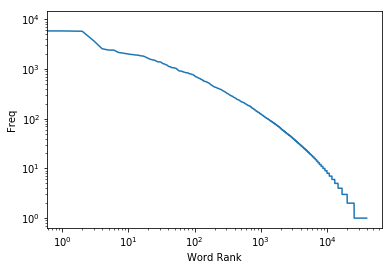

In [52]:
sorted_word_counts = sorted(list(word_counter.values()), reverse=True)

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

In [55]:
sorted_word_counts
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The foll

Another related plot is the histogram of `sorted_word_counts`, which displays how many words have a count in a specific range.

Of course the distribution is highly peaked at low counts, i.e. most of the words appear which a low count, so we better display it on semilogarithmic axes to inspect the tail of the distribution.

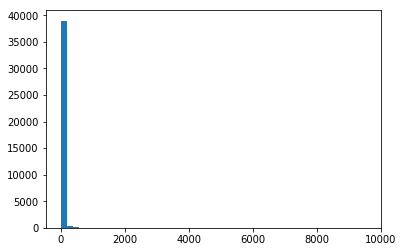

In [56]:
plt.hist(sorted_word_counts, bins=50);

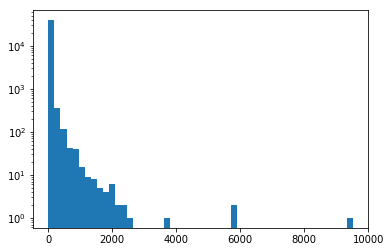

In [57]:
plt.hist(sorted_word_counts, bins=50, log=True);

## Train a Classifier for Sentiment Analysis

Using our `build_bag_of_words_features` function we can build separately the negative and positive features.
Basically for each of the 1000 negative and for the 1000 positive review, we create one dictionary of the words and we associate the label "neg" and "pos" to it.

In [64]:
#help(movie_reviews.words)
test_feature = [
    (build_bag_of_words_features_filtered(movie_reviews.words(fileids=f)), 'neg') \
    for f in negative_fileids
]

In [76]:
print(type(test_feature))
print(len(test_feature))
test_feature[:10]

<class 'list'>
1000


[({'10': 1,
   '2': 1,
   '20': 1,
   '3': 1,
   '4': 1,
   '7': 1,
   '8': 1,
   '9': 1,
   'accident': 1,
   'actors': 1,
   'actually': 1,
   'ago': 1,
   'also': 1,
   'although': 1,
   'always': 1,
   'american': 1,
   'apparently': 1,
   'apparitions': 1,
   'applaud': 1,
   'arrow': 1,
   'assuming': 1,
   'attempt': 1,
   'audience': 1,
   'away': 1,
   'back': 1,
   'bad': 1,
   'beauty': 1,
   'bentley': 1,
   'big': 1,
   'biggest': 1,
   'bit': 1,
   'blair': 1,
   'bottom': 1,
   'break': 1,
   'came': 1,
   'character': 1,
   'characters': 1,
   'chase': 1,
   'chasing': 1,
   'chopped': 1,
   'church': 1,
   'clue': 1,
   'coming': 1,
   'completely': 1,
   'concept': 1,
   'confusing': 1,
   'continues': 1,
   'cool': 1,
   'correctly': 1,
   'couples': 1,
   'craziness': 1,
   'critique': 1,
   'crow': 1,
   'dead': 1,
   'deal': 1,
   'decent': 1,
   'decided': 1,
   'despite': 1,
   'dies': 1,
   'different': 1,
   'dig': 1,
   'director': 1,
   'disappearances': 1,


In [68]:
negative_features = [
    (build_bag_of_words_features_filtered(movie_reviews.words(fileids=[f])), 'neg') \
    for f in negative_fileids
]

In [78]:
#print(negative_features[3])
print(type(negative_features))
print(len(negative_features))
negative_features[:10]
test_feature==negative_features

<class 'list'>
1000


True

In [79]:
positive_features = [
    (build_bag_of_words_features_filtered(movie_reviews.words(fileids=[f])), 'pos') \
    for f in positive_fileids
]

In [ ]:
print(positive_features[6])

In [81]:
from nltk.classify import NaiveBayesClassifier

One of the simplest supervised machine learning classifiers is the Naive Bayes Classifier, it can be trained on 80% of the data to learn what words are generally associated with positive or with negative reviews.

In [82]:
split = 800

In [83]:
sentiment_classifier = NaiveBayesClassifier.train(positive_features[:split]+negative_features[:split])

We can check after training what is the accuracy on the training set, i.e. the same data used for training, we expect this to be a very high number because the algorithm already "saw" those data. Accuracy is the fraction of the data that is classified correctly, we can turn it into percent:

In [84]:
nltk.classify.util.accuracy(sentiment_classifier, positive_features[:split]+negative_features[:split])*100

98.0625

The accuracy above is mostly a check that nothing went very wrong in the training, the real measure of accuracy is on the remaining 20% of the data that wasn't used in training, the test data:

In [85]:
nltk.classify.util.accuracy(sentiment_classifier, positive_features[split:]+negative_features[split:])*100

71.75

Accuracy here is around 70% which is pretty good for such a simple model if we consider that the estimated accuracy for a person is about 80%.
We can finally print the most informative features, i.e. the words that mostly identify a positive or a negative review:

In [86]:
sentiment_classifier.show_most_informative_features()

Most Informative Features
             outstanding = 1                 pos : neg    =     13.9 : 1.0
               insulting = 1                 neg : pos    =     13.7 : 1.0
              vulnerable = 1                 pos : neg    =     13.0 : 1.0
               ludicrous = 1                 neg : pos    =     12.6 : 1.0
             uninvolving = 1                 neg : pos    =     12.3 : 1.0
                  avoids = 1                 pos : neg    =     11.7 : 1.0
              astounding = 1                 pos : neg    =     11.7 : 1.0
             fascination = 1                 pos : neg    =     11.0 : 1.0
                    anna = 1                 pos : neg    =     10.3 : 1.0
               affecting = 1                 pos : neg    =     10.3 : 1.0


In [88]:
help(sentiment_classifier.show_most_informative_features)
help(NaiveBayesClassifier.train)

Help on method show_most_informative_features in module nltk.classify.naivebayes:

show_most_informative_features(n=10) method of nltk.classify.naivebayes.NaiveBayesClassifier instance

Help on method train in module nltk.classify.naivebayes:

train(labeled_featuresets, estimator=<class 'nltk.probability.ELEProbDist'>) method of builtins.type instance
    :param labeled_featuresets: A list of classified featuresets,
        i.e., a list of tuples ``(featureset, label)``.



In [91]:
#negative_features[0]

In [94]:
help(sentiment_classifier.show_most_informative_features)

Help on method show_most_informative_features in module nltk.classify.naivebayes:

show_most_informative_features(n=10) method of nltk.classify.naivebayes.NaiveBayesClassifier instance



In [97]:
#help(nltk.classify.util)

In [110]:
#nltk.classify.util.attested_labels(sentiment_classifier, ['amazing, 'amazing', 'amazing', 'amazing])

In [109]:
help(sentiment_classifier.classify)
#print(sentiment_classifier.classify([{'amazing':4},'pos']))

Help on method classify in module nltk.classify.naivebayes:

classify(featureset) method of nltk.classify.naivebayes.NaiveBayesClassifier instance
    :return: the most appropriate label for the given featureset.
    :rtype: label



In [104]:
negative_features[0:1]

[({'10': 1,
   '2': 1,
   '20': 1,
   '3': 1,
   '4': 1,
   '7': 1,
   '8': 1,
   '9': 1,
   'accident': 1,
   'actors': 1,
   'actually': 1,
   'ago': 1,
   'also': 1,
   'although': 1,
   'always': 1,
   'american': 1,
   'apparently': 1,
   'apparitions': 1,
   'applaud': 1,
   'arrow': 1,
   'assuming': 1,
   'attempt': 1,
   'audience': 1,
   'away': 1,
   'back': 1,
   'bad': 1,
   'beauty': 1,
   'bentley': 1,
   'big': 1,
   'biggest': 1,
   'bit': 1,
   'blair': 1,
   'bottom': 1,
   'break': 1,
   'came': 1,
   'character': 1,
   'characters': 1,
   'chase': 1,
   'chasing': 1,
   'chopped': 1,
   'church': 1,
   'clue': 1,
   'coming': 1,
   'completely': 1,
   'concept': 1,
   'confusing': 1,
   'continues': 1,
   'cool': 1,
   'correctly': 1,
   'couples': 1,
   'craziness': 1,
   'critique': 1,
   'crow': 1,
   'dead': 1,
   'deal': 1,
   'decent': 1,
   'decided': 1,
   'despite': 1,
   'dies': 1,
   'different': 1,
   'dig': 1,
   'director': 1,
   'disappearances': 1,


## from python tutorial

In [111]:
names = ([(name, 'male') for name in ('Aaron', 'Abbey', 'Abbie')] +
         [(name, 'female') for name in ('Zorana', 'Zorina', 'Zorine')])
names

[('Aaron', 'male'),
 ('Abbey', 'male'),
 ('Abbie', 'male'),
 ('Zorana', 'female'),
 ('Zorina', 'female'),
 ('Zorine', 'female')]

In [112]:
def gender_features(word):
    return{'last_letter': word[-1]}

In [113]:
test_feature = [(gender_features(n),g) for (n,g) in names]
test_feature

[({'last_letter': 'n'}, 'male'),
 ({'last_letter': 'y'}, 'male'),
 ({'last_letter': 'e'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female')]

In [114]:
test_classifier = nltk.NaiveBayesClassifier.train(test_feature)

In [115]:
gender_features('Frank')

{'last_letter': 'k'}

In [124]:
test_classifier.classify([gender_features('Frank'), gender_features('Alice')])

AttributeError: 'list' object has no attribute 'keys'

In [117]:
sentiment_classifier.classify({'amazing':4})

'pos'

In [122]:
sentiment_classifier.classify({'insulting':1,'amazing':3})

'neg'

In [131]:
sentiment_classifier.classify(negative_features[800][0])

'pos'

In [128]:
type(positive_features[800][0])

dict